<a href="https://colab.research.google.com/github/ALAIKBITTUQOH/UTS_Pengolahan-Citra-Digital/blob/main/23422033_ALAIK_BITTUQOH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload your image file:


Saving Amazing-original-backgrounds.jpg to Amazing-original-backgrounds (5).jpg


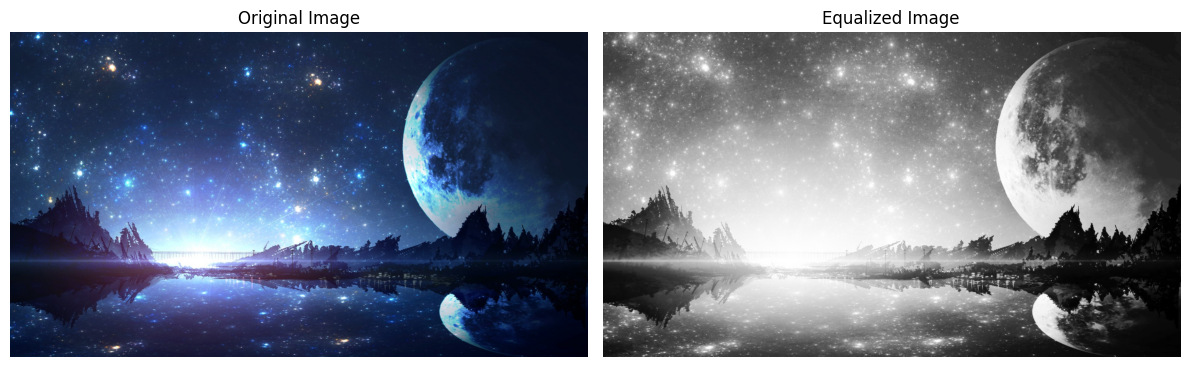

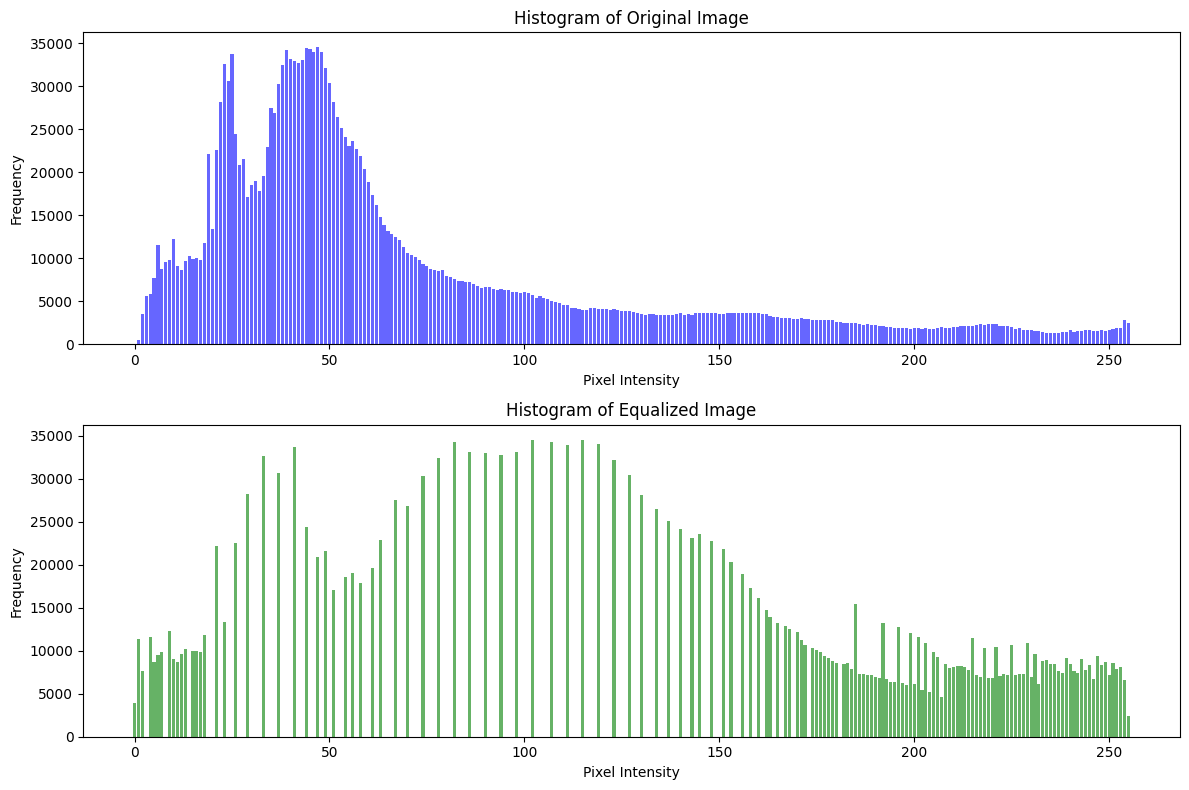

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

print("Please upload your image file:")
uploaded = files.upload()

image_path = next(iter(uploaded))
original_image = cv2.imread(image_path)
image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

image = image.astype(np.uint16)

height, width = image.shape[:2]
h = [0] * 256
h2 = [0] * 256
c = [0] * 256

for i in range(height):
    for j in range(width):
        r, g, b = image[i, j]

        xg = (r + g + b) // 3

        xg = np.clip(xg, 0, 255)

        h[xg] += 1

total_pixels = height * width
cum_sum = 0

for i in range(256):
    cum_sum += h[i]
    c[i] = (cum_sum * 255) // total_pixels

equalized_image = np.zeros_like(image, dtype=np.uint8)

for i in range(height):
    for j in range(width):
        r, g, b = image[i, j]
        xg = (r + g + b) // 3

        xg = np.clip(xg, 0, 255)

        new_value = c[xg]
        equalized_image[i, j] = [new_value, new_value, new_value]

for i in range(256):
    h2[c[i]] += h[i]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image.astype(np.uint8))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(range(256), h, color='blue', alpha=0.6)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.bar(range(256), h2, color='green', alpha=0.6)
plt.title('Histogram of Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
